In [8]:
# %matplotlib inline  
import re
import numpy as np
import cv2
from cv2 import VideoWriter, VideoWriter_fourcc
import matplotlib
# matplotlib.use('TkAgg')
from matplotlib import pyplot as plt

In [2]:
with open('jason.1.input') as f:
    data = [ line.strip().rstrip() for line in f.readlines() ]
print('Got {} points'.format(len(data)))

Got 369 points


In [3]:
# position=<-30052,  -9918> velocity=< 3,  1>

In [4]:
class Point:
    def __init__(self,x,y,vx,vy):
        self.x0 = int(x)
        self.y0 = int(y)
        self.x = int(x)
        self.y = int(y)
        self.vx = int(vx)
        self.vy = int(vy)
        
    def reset(self):
        self.x=self.x0
        self.y=self.y0
        
    def step(self, dt):
        self.x += self.vx*dt
        self.y += self.vy*dt
        return (self.x,self.y)
    
    def get_pos(self):
        return (self.x,self.y)

In [5]:
points = []
r = "position=<[ ]?([-]?\d+), [ ]?([- ]?\d+)> velocity=<([ ]?[- ]?\d+), [ ]?([- ]?\d+)>"
for d in data:
    x,y,vx,vy = re.match(r,d).groups()
    points.append(Point(x,y,vx,vy))
 
    
print(min(p.x for p in points),max(p.x for p in points))
print(min(p.y for p in points),max(p.y for p in points))

-50269 50652
-50263 50606


In [23]:
def get_spread(points):
    return (max(p.x for p in points)-min(p.x for p in points)) + (max(p.y for p in points)-min(p.y for p in points))

a=[ p.reset() for p in points ]

dt = 1
now = 0
spread = []
min_spread = 99999
min_spread_time = 0
frame = []
while now<11000:
    if now>9500:
        if now>10080 and now<10092:
            plt.scatter([e[0] for e in [p.get_pos() for p in points]], [e[1] for e in [p.get_pos() for p in points]])
            plt.savefig('movie/{0:3}.jpg'.format(now))
            plt.clf()
            
        s = get_spread(points)
        if s < min_spread:
            min_spread = s
            min_spread_time = now
            frame = [p.get_pos() for p in points]
        spread.append((now, s))
    [ p.step(dt) for p in points ]
    now+=dt

a=[ p.reset() for p in points ]
print('Spread {} at {}'.format(min_spread, min_spread_time))

Spread 70 at 10086


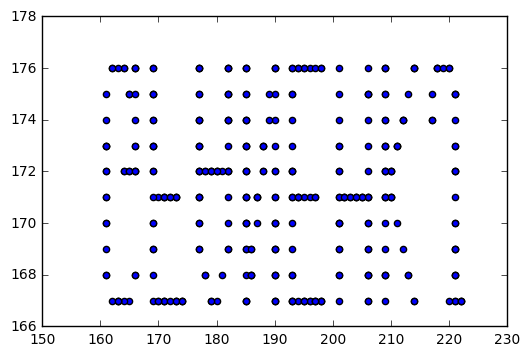

<built-in function min>


In [19]:
plt.scatter([e[0] for e in frame], [e[1] for e in frame])
plt.savefig('movie/001.jpg')
plt.show()
print(min)